In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
res = 1024
radius = 58

image = np.zeros((res, res))

In [3]:
xx, yy =  np.meshgrid(np.arange(-radius, radius+1), np.arange(-radius, radius+1))

In [4]:
xx

array([[-58, -57, -56, ...,  56,  57,  58],
       [-58, -57, -56, ...,  56,  57,  58],
       [-58, -57, -56, ...,  56,  57,  58],
       ...,
       [-58, -57, -56, ...,  56,  57,  58],
       [-58, -57, -56, ...,  56,  57,  58],
       [-58, -57, -56, ...,  56,  57,  58]])

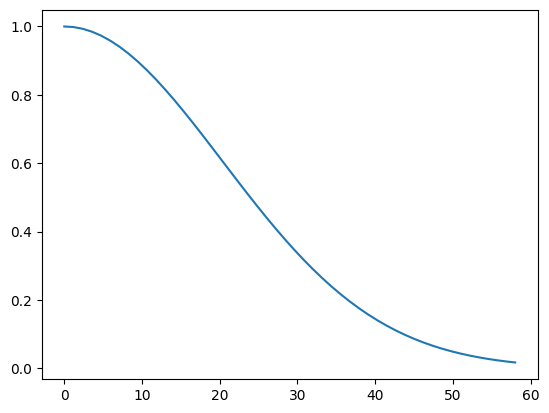

0.990052814344637

In [5]:

# set scaling such that the last Y-value is ca. 1/radius (manually chosen)
scale = 1.21e-3
mu = 0
X = np.linspace(0, radius)
Y = np.exp(-(X - mu)*(X - mu)*scale)
plt.plot(X, Y)
plt.show()
Y[-1]*radius

In [6]:
bell = np.exp(-((xx - mu)*(xx - mu)+(yy - mu)*(yy - mu))*scale)

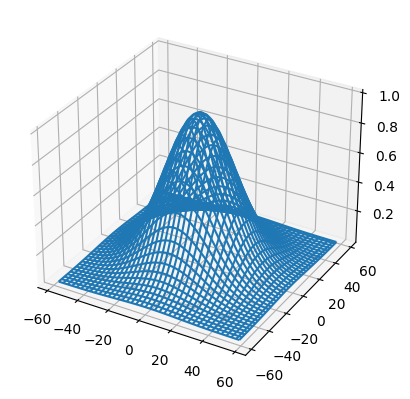

In [7]:

from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(projection='3d')
ax.plot_wireframe(xx, yy, bell)
plt.show()

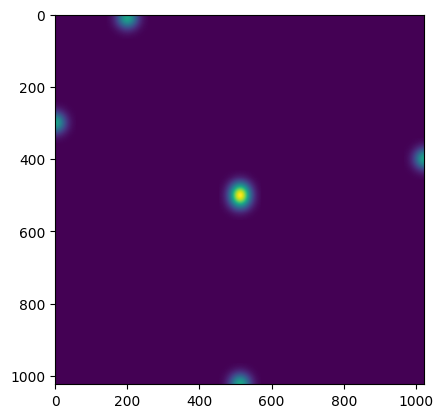

In [8]:
image_with_margin = np.zeros((res + 2*radius, res + 2*radius))

def add_gaussian_bell_to_image(img, x, y):
    """
    place precomputed bell to specific place on the image
    """
    
    assert 0 <= x < res
    assert 0 <= y < res
    
    # account for margin
    x += radius
    y += radius
    
    idx_x1 = x - radius
    idx_x2 = x + radius + 1
    
    idx_y1 = y - radius
    idx_y2 = y + radius + 1
    
    img[idx_x1:idx_x2, idx_y1: idx_y2] += bell

# check behavior add the border
add_gaussian_bell_to_image(image_with_margin, 10, 200)
add_gaussian_bell_to_image(image_with_margin, 300, 0)
add_gaussian_bell_to_image(image_with_margin, 400, res-1)
add_gaussian_bell_to_image(image_with_margin, res-1, 512)

# add two partially overlapping bells in the center
add_gaussian_bell_to_image(image_with_margin, 512, 512)
add_gaussian_bell_to_image(image_with_margin, 490, 512)

# crop margin
image = image_with_margin[radius:-radius, radius:-radius]
plt.imshow(image)
plt.show()

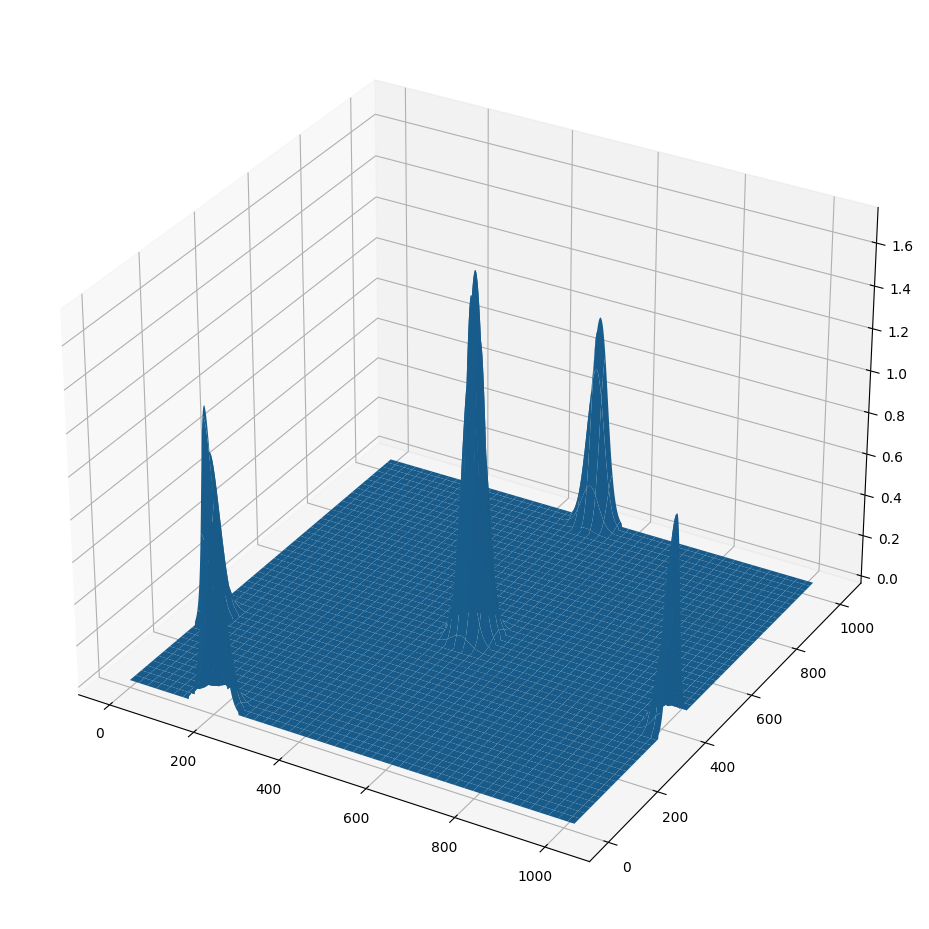

In [9]:
XX, YY =  np.meshgrid(np.arange(res), np.arange(res))

mm = 1/25.4 # mm to inch
fs = [400*mm, 300*mm]
plt.figure(figsize=fs, dpi=100)

ax = plt.subplot(projection='3d')

ax.plot_surface(XX, YY, image)
# optional: show the 1.0 level set
# ax.plot_surface(XX, YY, image*0 + 1, alpha=0.4)
plt.show()